# 필요 라이브러리

In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np

2025-09-22 11:40:59.453876: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-09-22 11:40:59.454072: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-09-22 11:40:59.739941: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-09-22 11:41:00.214189: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-09-22 11:41:07.327217: W tensorflow/compiler/tf2

# 데이터 준비

In [2]:
Data_set = np.loadtxt("./data/ThoraricSurgery3.csv", delimiter=",")
X = Data_set[:,0:16]
y = Data_set[:,16]      
# X.shape, y.shape
X[0], X.shape, y[0], y.shape

(array([ 1.  ,  2.88,  2.16,  1.  ,  0.  ,  0.  ,  0.  ,  1.  ,  1.  ,
         3.  ,  0.  ,  0.  ,  0.  ,  1.  ,  0.  , 60.  ]),
 (470, 16),
 0.0,
 (470,))

# 구조 결정

In [3]:
model = Sequential()
model.add(Dense(30, input_dim=16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                510       
                                                                 
 dense_1 (Dense)             (None, 1)                 31        
                                                                 
Total params: 541 (2.11 KB)
Trainable params: 541 (2.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


2025-09-22 11:41:27.042948: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:887] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2025-09-22 11:41:29.373849: W tensorflow/core/common_runtime/gpu/gpu_device.cc:2256] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


# 모델 학습과정 설정

In [4]:
model.compile(loss='binary_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

# 모델 학습

In [5]:
history=model.fit(X,
                  y,
                  epochs=5, 
                  batch_size=16)

Epoch 1/5
30/30 [==============================] - 1s 2ms/step - loss: 0.8629 - accuracy: 0.8383
Epoch 2/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4499 - accuracy: 0.8404
Epoch 3/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4295 - accuracy: 0.8511
Epoch 4/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4354 - accuracy: 0.8489
Epoch 5/5
30/30 [==============================] - 0s 2ms/step - loss: 0.4304 - accuracy: 0.8511


# 간단한 모델로 점검하기

In [23]:
import tensorflow as tf
from tensorflow.keras import datasets as ds
import matplotlib.pyplot as plt
(x_train, y_train), (x_test, y_test) = ds.mnist.load_data()
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

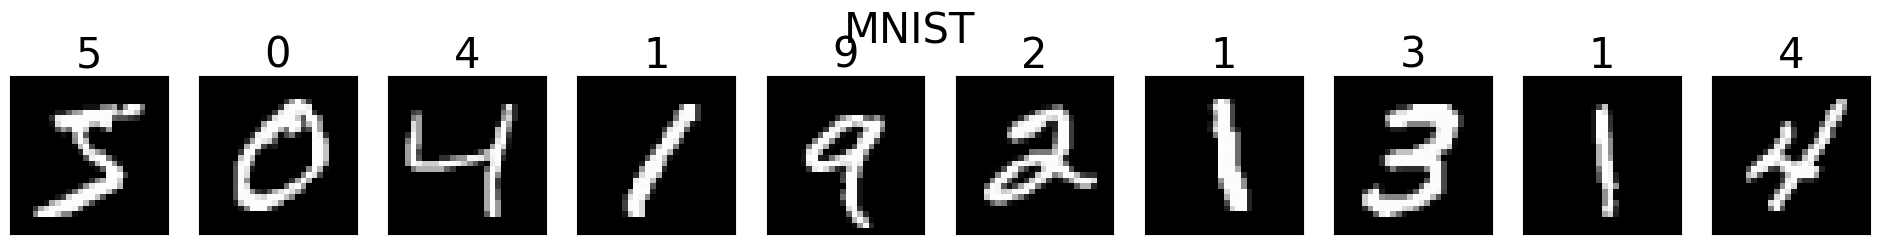

In [24]:
plt.figure(figsize=(24,3))
plt.suptitle('MNIST',fontsize=30)
for i in range(10) :
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([]); plt.yticks([])
    plt.title(str(y_train[i]),fontsize=30)

# 간단한 모델로 점검하기

In [25]:
from tensorflow.keras.layers import Dense, Input,Dropout
from tensorflow.keras import Model

In [26]:
X_train = x_train[:1000] ; Y_train = y_train[:1000]
X_train.shape, Y_train.shape

((1000, 28, 28), (1000,))

In [27]:
# DNN 모델 -> 1차원 입력필요
X_train = X_train.reshape(-1,X_train.shape[1]*X_train.shape[2])/255.0
X_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [28]:
X_train.shape

(1000, 784)

In [19]:
inp = Input(X_train.shape[1])
x = Dense(units=1024, activation='relu')(inp)
x = Dense(units=512, activation='relu')(x)
x = Dense(units=10, activation='softmax')(x)
model = Model(inputs=inp,outputs=x)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_5 (Dense)             (None, 1024)              803840    
                                                                 
 dense_6 (Dense)             (None, 512)               524800    


                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 1333770 (5.09 MB)
Trainable params: 1333770 (5.09 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
model.compile(optimizer= 'adam', metrics = ['accuracy'], loss = 'sparse_categorical_crossentrophy')

# CIFAR 데이터셋

In [11]:
(x_train, y_train), (x_test, y_test) = ds.cifar10.load_data()
x_train.shape, x_test.shape,y_train.shape, y_test.shape

((50000, 32, 32, 3), (10000, 32, 32, 3), (50000, 1), (10000, 1))

In [12]:
class_name = ['airplane','car','bird','cat','deer','dog','frog','horse','ship','truck']

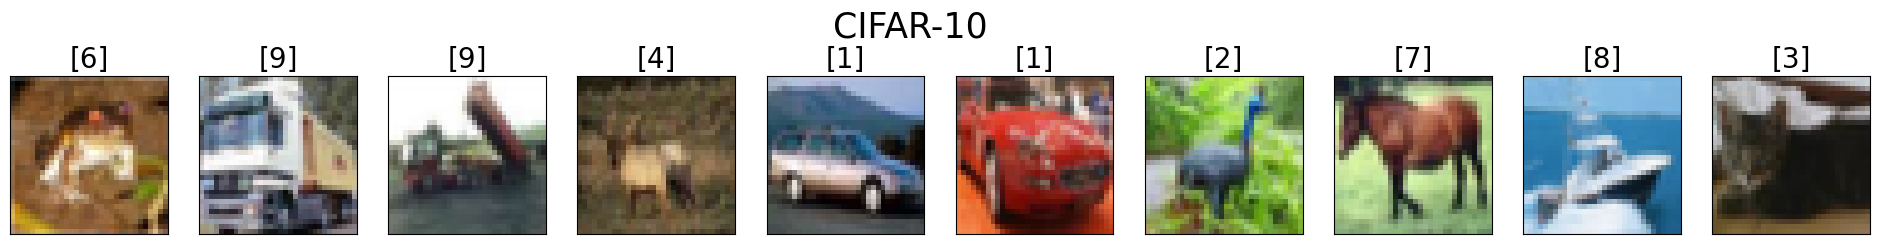

In [13]:
plt.figure(figsize=(24,3))
plt.suptitle('CIFAR-10',fontsize=25)
for i in range(10) :
    plt.subplot(1,10,i+1)
    plt.imshow(x_train[i])
    plt.xticks([]); plt.yticks([])
    plt.title(str(y_train[i]),fontsize=20)

In [28]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Input,Flatten